# Pivot‑Table Practice Lab (21 Questions)

Each question simulates a small DataFrame.  
**Your task:** create the requested pivot table (or tidy reshape) *below the simulation cell*.
Once you are finished, you can meet with your group. 

---



# Tidy Data Frame

A **tidy data frame** follows three simple rules:

1. **Each variable** is a column.  
2. **Each observation** (or case) is a row.  
3. **Each value** is a single cell.

For example, this is _tidy_:

| country | year | population |
| ------- | ---- | ---------- |
| A       | 2000 | 1,000,000  |
| A       | 2010 | 1,100,000  |
| B       | 2000 | 500,000    |
| B       | 2010 | 600,000    |


Here “country”, “year”, and “population” are each their own columns, and every row is one observation.

---

# Pivot Table

A **pivot table** is a way to **reshape** and **summarize** data:

- **Rows** and **columns** become grouping variables.  
- **Cell values** are computed by applying an aggregation (sum, mean, count, etc.) to the data in each group.

Using the same data, a pivot table showing population by country and year might look like:

| country | 2000      | 2010      |
| ------- | --------- | --------- |
| A       | 1,000,000 | 1,100,000 |
| B       | 500,000   | 600,000   |


Here we’ve “pivoted” the year values into separate columns and filled in the population.

---

# Wide vs. Long Format

- **Wide format**  
  - Variables that could be rows (e.g. “year”) become separate columns.  
  - Good for human‐readable tables or specific plotting functions.  

| country | pop\_2000 | pop\_2010 |
| ------- | --------- | --------- |
| A       | 1,000,000 | 1,100,000 |
| B       | 500,000   | 600,000   |


- **Long format**  
- Each row is one measurement; variable names live in a single column, with their values in another.  
- Ideal for most data‐analysis and plotting libraries (e.g., pandas “melt”).

| country | year | population |
| ------- | ---- | ---------- |
| A       | 2000 | 1,000,000  |
| A       | 2010 | 1,100,000  |
| B       | 2000 | 500,000    |
| B       | 2010 | 600,000    |



# Useful commands

In [5]:
import pandas as pd

# Sample long DataFrame
df = pd.DataFrame({
  'country': ['A','A','B','B'],
  'year':    [2000,2010,2000,2010],
  'population': [1_000_000,1_100_000,500_000,600_000]
})

In [6]:
# 1. Long → Wide with pivot (no aggregation)
df_wide = df.pivot(index='country', columns='year', values='population')

df_wide

year,2000,2010
country,,
A,1000000,1100000
B,500000,600000


In [7]:
# 2. Long → Wide with aggregation (sum, mean, etc.)
df_pt = df.pivot_table(
  index='country',
  columns='year',
  values='population',
  aggfunc='sum'
)

df_pt

year,2000,2010
country,,
A,1000000,1100000
B,500000,600000


In [8]:
# 3. Wide → Long with melt
df_wide_reset = df_wide.reset_index()  # bring 'country' back to a column
df_long = df_wide_reset.melt(
  id_vars='country',
  var_name='year',
  value_name='population'
)

df_long

,country,year,population
0,A,2000,1000000
1,B,2000,500000
2,A,2010,1100000
3,B,2010,600000


In [9]:
# 4. Tidying a more complex wide table
# Suppose you have separate year columns: pop_2000, pop_2010
df2 = pd.DataFrame({
  'country': ['A','B'],
  'pop_2000': [1_000_000, 500_000],
  'pop_2010': [1_100_000, 600_000]
})
df2_long = df2.melt(
  id_vars='country',
  value_vars=['pop_2000','pop_2010'],
  var_name='year',
  value_name='population'
)
# Clean up 'year' values
df2_long['year'] = df2_long['year'].str.replace('pop_','').astype(int)

df2_long

,country,year,population
0,A,2000,1000000
1,B,2000,500000
2,A,2010,1100000
3,B,2010,600000


## Question 1 — Region × Units Sold

Create a pivot table that shows **total units** sold in each region (i.e. region | units, use pd.pivot_table)

In [10]:
import pandas as pd, numpy as np
np.random.seed(0)
regions = ['North','South','East','West']
items = ['Widget']
df = pd.DataFrame({
    'region': np.random.choice(regions, size=20),
    'item': 'Widget',
    'units': np.random.randint(1, 11, 20)
})

df_pt = df.pivot_table(
  index='region',
  columns='item',
  values='units',
  aggfunc='sum'
)

df_pt


item,Widget
region,
East,4
North,36
South,26
West,46


<details><summary><strong>Show Solution</strong></summary>

```python
pd.pivot_table(df, index='region', values='units', aggfunc='sum')
```

</details>

## Question 2 — Average Temperature per City

Compute the **average temperature** for each city using a pivot table (use pivot_table)

In [11]:
np.random.seed(1)
cities = ['Boston','Chicago','Seattle']
dates = pd.date_range('2025-07-01', periods=15)
df = pd.DataFrame({
    'city': np.random.choice(cities, size=45),
    'date': np.tile(dates, 3),
    'temp_C': np.random.normal(25, 3, 45)
})

df_pt = df.pivot_table(
  index='city',
  values='temp_C',
  aggfunc='mean'
)

df_pt


,temp_C
city,
Boston,24.596432
Chicago,25.396862
Seattle,26.058069


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='city', values='temp_C', aggfunc='mean')
```

</details>

## Question 3 — Count Students by Grade

Produce a pivot table counting how many students earned each grade.

In [12]:
np.random.seed(2)
grades = ['A','B','C','D']
df = pd.DataFrame({
    'student_id': range(1,51),
    'grade': np.random.choice(grades, 50)
})

df_pt = df.pivot_table(
  index='grade',
  values='student_id',
  aggfunc='count'
)

df_pt


,student_id
grade,
A,12
B,7
C,12
D,19


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='grade', values='student_id', aggfunc='count')
```

</details>

## Question 4 — Quarterly Department Expenses

Pivot the table so **quarters become columns** and expenses fill values. Use pd.pivot.

In [13]:
np.random.seed(3)
depts = ['HR','IT','Sales']
quarters = ['Q1','Q2','Q3','Q4']
records = [(d,q,np.random.randint(5000,20000)) for d in depts for q in quarters]
df = pd.DataFrame(records, columns=['department','quarter','expense'])

df_wide = df.pivot(index='department', columns='quarter', values='expense')

df_wide



quarter,Q1,Q2,Q3,Q4
department,,,,
HR,10994,6688,16513,14859
IT,14160,11400,13981,16261
Sales,7707,19026,16115,12161


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot(index='department', columns='quarter', values='expense')
```

</details>

## Question 5 — Wide‑to‑Long Patient BP

Melt the DataFrame to long form with columns: patient, day, bp.

In [14]:
np.random.seed(4)
df = pd.DataFrame({
    'patient':['P1','P2','P3'],
    'day1': np.random.randint(110,130,3),
    'day2': np.random.randint(110,130,3),
    'day3': np.random.randint(110,130,3)
})

df_melt = pd.melt(df, id_vars = 'patient', var_name='day', value_name = 'bp')
df_melt

,patient,day,bp
0,P1,day1,124
1,P2,day1,115
2,P3,day1,111
3,P1,day2,118
4,P2,day2,118
5,P3,day2,128
6,P1,day3,119
7,P2,day3,117
8,P3,day3,123


<details><summary><strong>Show Solution</strong></summary>

```python
df_long = df.melt(id_vars='patient', var_name='day', value_name='bp')
```

</details>

## Question 6 — Mean Score by Class & Subject

Pivot to show **average score** per class (rows) and subject (columns).

In [15]:
np.random.seed(5)
classes = ['A','B']
subjects = ['Math','History','Science']
records=[(c,s,np.random.randint(50,101)) for c in classes for s in subjects for _ in range(5)]
df=pd.DataFrame(records, columns=['class','subject','score'])
df.head()

df_pt = df.pivot_table(
  index='class',
  columns='subject',
  values='score',
  aggfunc='mean'
)

df_pt


subject,History,Math,Science
class,,,
A,73.8,80.0,72.6
B,73.2,79.2,69.8


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='class', columns='subject', values='score', aggfunc='mean')
```

</details>

## Question 7 — Satisfaction Counts by Gender

Count satisfied vs not by gender (rows=gender, cols=satisfied).

In [16]:
np.random.seed(6)
df = pd.DataFrame({
    'gender': np.random.choice(['F','M'], 30),
    'satisfied': np.random.choice([0,1], 30)
})

df_pt = df.pivot_table(
  index='gender',
  values='satisfied',
  aggfunc='count'
)

df_pt



,satisfied
gender,
F,15
M,15


<details><summary><strong>Show Solution</strong></summary>

```python
pd.pivot_table(df, index='gender', columns='satisfied', values='satisfied', aggfunc='count', fill_value=0)
```

</details>

## Question 8 — Handle Missing Units Before Pivot

Fill missing units with 0, then sum units per store×category.

In [17]:
np.random.seed(7)
df = pd.DataFrame({
    'store': np.random.choice(['A','B','C'], 15),
    'category': np.random.choice(['X','Y'], 15),
    'units': np.random.randint(1,20,15).astype(float)
})
# Introduce missing
df.loc[df.sample(5).index, 'units'] = np.nan
df.fillna(0)


df_pt = df.pivot_table(
  index='store',
  columns='category',
  values='units',
  aggfunc='sum'
)

df_pt


category,X,Y
store,,
A,16.0,26.0
B,15.0,15.0
C,4.0,24.0


<details><summary><strong>Show Solution</strong></summary>

```python
df_filled = df.fillna({'units':0})
df_filled.pivot_table(index='store', columns='category', values='units', aggfunc='sum')
```

</details>

## Question 9 — Split Year‑Month Column

Split year_month into separate year and month columns, then pivot to show total sales by month (columns) for each year.

In [18]:
np.random.seed(8)
df = pd.DataFrame({
    'year_month': ['2025-01','2025-02','2025-01','2025-02'],
    'sales': np.random.randint(100,200,4)
})

df[['year', 'month']] = df['year_month'].str.split('-', expand = True)

df_pt = df.pivot_table(
  index='year',
  columns='month',
  values='sales',
  aggfunc='sum'
)

df_pt



month,01,02
year,,
2025,272,374


<details><summary><strong>Show Solution</strong></summary>

```python
df[['year','month']] = df['year_month'].str.split('-', expand=True)
df.pivot_table(index='year', columns='month', values='sales', aggfunc='sum')
```

</details>

## Question 10 — Trim Whitespace Categories

Strip whitespace in 'team ' column, then average score per team.

In [19]:
np.random.seed(9)
df = pd.DataFrame({
    'team ': [' Red','Blue ',' Red','Blue '],
    'score': np.random.randint(10,30,4)
})
df['team '].str.strip()


df_pt = df.pivot_table(
  index='team ',
  values='score',
  aggfunc='mean'
)

df_pt




,score
team,
Red,19.0
Blue,14.5


<details><summary><strong>Show Solution</strong></summary>

```python
df['team '] = df['team '].str.strip()
df.pivot_table(index='team ', values='score', aggfunc='mean')
```

</details>

## Question 11 — Duplicate Keys Needing Aggregation

Create a pivot table of **total revenue** per date with products as columns.

In [20]:
np.random.seed(10)
df = pd.DataFrame({
    'date': pd.date_range('2025-01-01', periods=6, freq='D').repeat(2),
    'product': ['A','B']*6,
    'revenue': np.random.randint(50,150,12)
})

df_pt = df.pivot_table(
  index='date',
  columns='product',
  values='revenue',
  aggfunc='sum'
)

df_pt

product,A,B
date,,
2025-01-01,59,65
2025-01-02,114,78
2025-01-03,139,143
2025-01-04,79,58
2025-01-05,123,50
2025-01-06,90,86


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='date', columns='product', values='revenue', aggfunc='sum')
```

</details>

## Question 12 — Mean & Std in Same Pivot

Produce pivot with both mean and std of measure for each group.

In [21]:
np.random.seed(11)
df = pd.DataFrame({
    'group': np.random.choice(['G1','G2'], 30),
    'measure': np.random.normal(0,1,30)
})
df.head()


df_pt = df.pivot_table(
  index='group',
  values='measure',
  aggfunc=['mean', 'std']
)

df_pt


,mean,std
,measure,measure
group,,
G1,-0.254744,0.951633
G2,-0.050687,0.760760


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='group', values='measure', aggfunc=['mean','std'])
```

</details>

## Question 13 — Remove Duplicates Before Pivot

Keep only the latest status per id (keep first occurrence), then pivot status as columns and value as values.

In [22]:
np.random.seed(12)
df = pd.DataFrame({
    'id': np.r_[np.arange(1,6), np.arange(1,6)],
    'status': ['new','old']*5,
    'value': np.random.randint(1,100,10)
})
df.drop_duplicates('id', keep = 'first')


df_pt = df.pivot_table(
  index='id',
  columns='status',
  values='value'
)

df_pt

status,new,old
id,,
1,76.0,68.0
2,77.0,28.0
3,7.0,49.0
4,23.0,3.0
5,4.0,50.0


<details><summary><strong>Show Solution</strong></summary>

```python
latest = df.drop_duplicates('id', keep='first')
latest.pivot(index='id', columns='status', values='value')
```

</details>

## Question 14 — Monthly Sales Trend

Convert 'date' to datetime, extract month, then sum sales per month.

In [23]:
np.random.seed(13)
dates = pd.date_range('2025-01-01','2025-06-30', freq='D')
df = pd.DataFrame({
    'date': np.random.choice(dates, 100),
    'sales': np.random.randint(20,80,100)
})

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month


df_pt = df.pivot_table(
  index='month',
  values='sales',
  aggfunc='sum'
)

df_pt



,sales
month,
1,1171
2,547
3,900
4,469
5,1115
6,1121


<details><summary><strong>Show Solution</strong></summary>

```python
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
df.pivot_table(index='month', values='sales', aggfunc='sum')
```

</details>

## Question 15 — Sensor Readings Wide to Long

Melt to long form with columns timestamp, sensor, reading.

In [24]:
np.random.seed(14)
df = pd.DataFrame({
    'timestamp': pd.date_range('2025-07-15 00:00', periods=5, freq='h'),
    'sensorA': np.random.rand(5),
    'sensorB': np.random.rand(5)
})
df.melt(id_vars = 'timestamp', var_name = 'sensor', value_name = 'reading')


,timestamp,sensor,reading
0,2025-07-15 00:00:00,sensorA,0.513943
1,2025-07-15 01:00:00,sensorA,0.773165
2,2025-07-15 02:00:00,sensorA,0.870428
3,2025-07-15 03:00:00,sensorA,0.008047
4,2025-07-15 04:00:00,sensorA,0.309736
5,2025-07-15 00:00:00,sensorB,0.957604
6,2025-07-15 01:00:00,sensorB,0.513117
7,2025-07-15 02:00:00,sensorB,0.318284
8,2025-07-15 03:00:00,sensorB,0.539200
9,2025-07-15 04:00:00,sensorB,0.221255


<details><summary><strong>Show Solution</strong></summary>

```python
df_long = df.melt(id_vars='timestamp', var_name='sensor', value_name='reading')
```

</details>

## Question 16 — Compute Conversion Rate

Pivot to compute **conversion rate** (mean of converted) per campaign.

In [25]:
np.random.seed(15)
df = pd.DataFrame({
    'campaign': np.random.choice(['Email','Ads'], 50),
    'converted': np.random.choice([0,1], 50)
})

df_pt = df.pivot_table( index = 'campaign', values = 'converted', aggfunc= 'mean')
df_pt


,converted
campaign,
Ads,0.433333
Email,0.450000


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='campaign', values='converted', aggfunc='mean')
```

</details>

## Question 17 — Split Category/Subcategory

Separate cat_sub into cat and sub, then sum qty with cat rows and sub columns.

In [28]:
np.random.seed(16)
df = pd.DataFrame({
    'cat_sub': ['A_X','A_Y','B_X','B_Y']*5,
    'qty': np.random.randint(1,5,20)
})

df[['cat', 'sub']] = df['cat_sub'].str.split('_', expand= True)
df_pt = df.pivot_table(values= 'qty', columns= 'sub', aggfunc='sum', index = 'cat')
df_pt

sub,X,Y
cat,,
A,12,14
B,7,9


<details><summary><strong>Show Solution</strong></summary>

```python
df[['cat','sub']] = df['cat_sub'].str.split('_', expand=True)
df.pivot_table(index='cat', columns='sub', values='qty', aggfunc='sum')
```

</details>

## Question 18 — Ordered Categories in Pivot

Set 'priority' as categorical ordered low<medium<high, then count tickets per priority (rows).

In [31]:
np.random.seed(17)
df = pd.DataFrame({
    'priority': np.random.choice(['low','medium','high'], 30),
    'tickets': 1
})
df['priority'] = pd.Categorical(df['priority'], categories = ['low','medium', 'high'], ordered = True)

df_pt = df.pivot_table(index = 'priority', values = 'tickets', aggfunc= 'count')
df_pt

/var/folders/d6/tmjrg0l50ld89cnqh49k16xr0000gn/T/ipykernel_6860/788990400.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pt = df.pivot_table(index = 'priority', values = 'tickets', aggfunc= 'count')


,tickets
priority,
low,6
medium,14
high,10


<details><summary><strong>Show Solution</strong></summary>

```python
df['priority'] = pd.Categorical(df['priority'], categories=['low','medium','high'], ordered=True)
df.pivot_table(index='priority', values='tickets', aggfunc='count').sort_index()
```

</details>

## Question 19 — Value Vars Melt Then Pivot

Melt height and weight into long, then compute average of each measure.

In [34]:
np.random.seed(18)
df = pd.DataFrame({
    'id': range(1,6),
    'height_cm': np.random.randint(150,190,5),
    'weight_kg': np.random.randint(50,90,5)
})
df_long = df.melt(id_vars = 'id', var_name = 'measure', value_name= 'value')
df = df_long.pivot_table(index = 'measure', values = 'value', aggfunc='mean')
df


,value
measure,
height_cm,161.6
weight_kg,67.4


<details><summary><strong>Show Solution</strong></summary>

```python
long = df.melt(id_vars='id', var_name='measure', value_name='value')
long.pivot_table(index='measure', values='value', aggfunc='mean')
```

</details>

## Question 20 — Outlier Filter Then Multi‑Metric Pivot

Filter out profits > 180, then compute mean & std profit per branch.

In [35]:
np.random.seed(19)
df = pd.DataFrame({
    'branch': np.random.choice(['East','West'], 100),
    'profit': np.random.normal(100,20,100)
})
# add outliers
df.loc[np.random.choice(df.index, 5, replace=False),'profit'] += 200

df_filtered = df[df['profit'] <=180]
df_filtered = df_filtered.pivot_table(index = 'branch', values = 'profit', aggfunc=['mean', 'std'])
df_filtered

,mean,std
,profit,profit
branch,,
East,94.978139,16.599105
West,99.304872,18.515838


<details><summary><strong>Show Solution</strong></summary>

```python
clean = df[df['profit']<=180]
clean.pivot_table(index='branch', values='profit', aggfunc=['mean','std'])
```

</details>

## Question 21: End‑to‑End Tidy Data & Exploratory Analysis

**Objective:**  
Practice the full workflow of acquiring real data, cleaning it into tidy form, performing exploratory visualizations, and communicating your first impressions.

---

### 1. Data Acquisition

1. **Choose a dataset**  
   - Find any publicly‑available CSV file online (e.g. Kaggle, UCI Machine Learning Repository, data.gov).  
2. **Download the file**  
   - Save it into your project folder as `data/your_dataset.csv`.  
   - Note the source URL and a brief description (what it measures, number of rows, columns).

---

### 2. Loading & Initial Inspection

1. **Import pandas**  
   - import pandas as pd  
2. **Read the CSV**  
   - df = pd.read_csv("data/your_dataset.csv")  
3. **Peek at the data**  
   - df.head()  
   - df.info()  
   - df.describe()

---

### 3. Tidying the Data

Follow the tidy‑data principles: one variable per column, one observation per row, one value per cell.

1. **Identify issues**  
   - Are there multiple measures in one column?  
   - Are columns encoding two variables (e.g. `2019_sales` and `2020_sales`)?  
   - Are any column names unclear or inconsistent?  
2. **Reshape as needed**  
   - Melt wide → long: df_long = df.melt(id_vars=[…], var_name="variable", value_name="value")  
   - Pivot long → wide: df_wide = df_long.pivot(index=[…], columns="variable", values="value")  
3. **Rename & convert**  
   - Standardize column names.  
   - Convert data types: df["date"] = pd.to_datetime(df["date"]), df["category"] = df["category"].astype("category")  
4. **Handle missing or duplicate data**  
   - Drop or impute missing values as appropriate.  
   - Remove exact duplicate rows: df = df.drop_duplicates()

---

### 4. Exploratory Data Analysis (EDA)

Create at least **three** different plots to understand structure or patterns. Examples:

- **Univariate distribution:** histogram or density plot of a numeric variable  
- **Bivariate relationship:** scatterplot of two continuous variables; boxplot or violin plot grouped by category  
- **Time series or trend:** line plot over time (if applicable)  
- **Categorical counts (optional):** bar chart of categorical frequencies  

Be sure to label axes, add titles, and choose sensible figure sizes.

---

### 5. Insights & Interpretation

Write **1–2 clear sentences** describing the most interesting pattern(s).  
Examples:  
- “Sales peak in Q4 each year, suggesting a strong holiday effect.”  
- “Advertising spend and website visits show a strong positive correlation (r ≈ 0.7).”


Challenge: how can you ensure that any one is able to download this data and make sure they get the same exact answer as you?




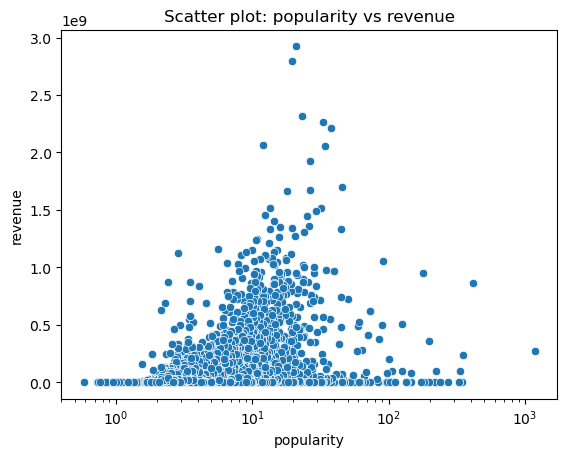

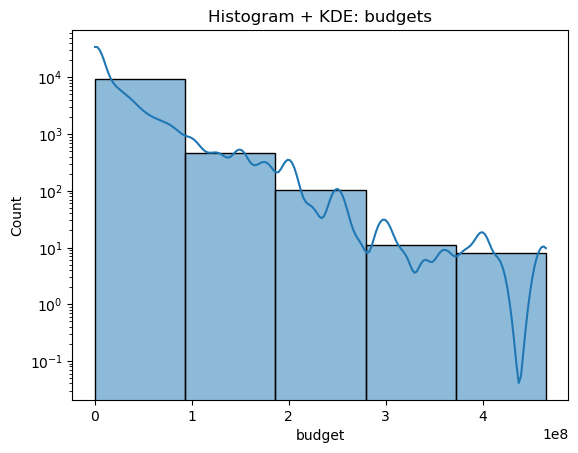

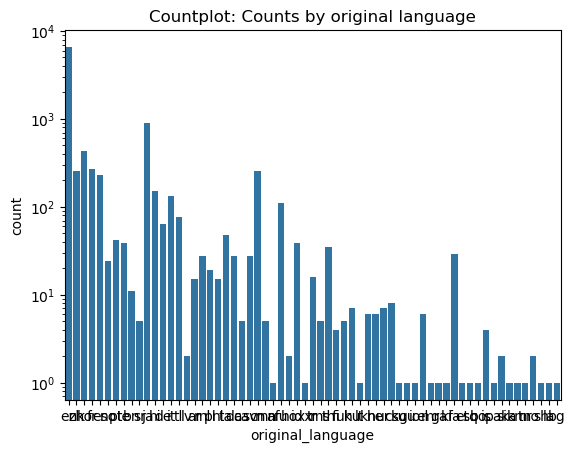

In [ ]:
import pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

df = pd.read_csv('/Users/connor/RISE/July12/popular_movies.csv')

df["release_date"] = pd.to_datetime(df["release_date"])

sns.scatterplot(data=df, x='popularity', y='revenue').set(xscale = 'log')
plt.title('Scatter plot: popularity vs revenue')
plt.show()

sns.histplot(df['budget'], kde=True, bins=5).set(yscale = 'log')
plt.title('Histogram + KDE: budgets')
plt.show()


sns.countplot(data = df, x='original_language').set(yscale = 'log')
plt.title('Countplot: Counts by original language')
plt.show()

#The number of movies is explonentially related to budget in increments of tens of millions of dollars 
#revenue increases linearly with popularity to a certain extent, then starts to decrease with increasing popularity.